# **Introducción a Redes Neuronales --- Tarea 5: Aproximador Universal y RBF**

*Autor: David Segura Carnet #13-11341*,
11/07/2020

In [1]:
from google.colab import drive
import numpy as np

# En caso de no usar Google Colab, eliminar la importacion de la libreria y el mount,
# Y modificar las rutas correspondientes de los archivos a cargar
drive.mount('/content/drive')

path_spectra_20 = '/content/drive/My Drive/RNA/Tarea 5/Spectra20.csv'
path_spectra_100 = '/content/drive/My Drive/RNA/Tarea 5/Spectra100.csv'
path_spectra_real = '/content/drive/My Drive/RNA/Tarea 5/SpectraReal.csv'

# Cargamos los datos y de una vez los escalamos dividiendo por 255
spectra_20 = np.loadtxt(open(path_spectra_20, "rb"), delimiter=",", skiprows=0)
spectra_100 = np.loadtxt(open(path_spectra_100, "rb"), delimiter=",", skiprows=0)
spectra_real = np.loadtxt(open(path_spectra_real, "rb"), delimiter=",", skiprows=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Parte 1: Aproximador Universal
Aproxime los datos en la serie dada por *spectra20.csv* usando un aproximador universal. Repita el ejercicio utilizando la técnica de regularización variando el parámetro de
regularización. Reporte el mejor resultado obtenido y su argumentación para que así sea. Reporte para ambos casos en número de condición de la matriz asociada.

In [4]:
import numpy as np
from math import exp

class UniversalApproximator:
  '''
    [Clase UniversalApproximator]
      Representara el aproximador universal donde se buscara construir una funcion
      que pase por todos los datos.

    INIT: phi_function   -> Función de base radial
          w              -> Pesos
          X              -> Datos de entrenamiento
          sigma          -> Dispersion
          lambd          -> Parametro de regularizacion
  '''
  def __init__(self, phi_function, lambd=0):
      self.phi_function = phi_function
      self.w = []
      self.X = []
      self.sigma = 1
      self.lambd = lambd

  def training(self, data, d, sigma=1):
    '''
      {Funcion training}
        Se realiza el entrenamiento no iterativo para el ajuste de los datos
        y calcular w
      INPUT:  data        -> Vector con los datos a procesar
              d           -> Valor esperado de un dato
              sigma       -> Dispersion
    '''
    self.X = data.copy()
    self.sigma = sigma
    phi_matrix = self.__green_matrix(data) + self.lambd * np.identity(len(data))
    phi_inv = np.linalg.inv(phi_matrix)
    self.w = np.dot(phi_inv, d)
    return np.linalg.cond(phi_inv)

  def predict(self, X):
    '''
      {Funcion predict}
        Funcion resultante para aproximar los datos
      INPUT:  X        -> Vector con los datos a procesar
      
      OUTPUT: matrix   -> Matriz resultante
    '''
    result = []
    for x in X:
      result.append(np.dot(self.w, [self.phi_function(x, xi, self.sigma) for xi in self.X]))
    return result

  def __green_matrix(self, X):
    '''
      {Funcion green_matrix}
        Se realiza el calculo de la matrix no-singular de las funciones
        radiales
      INPUT:  X        -> Vector con los datos a procesar
      
      OUTPUT: matrix   -> Matriz resultante
    '''
    matrix = []
    for i in X:
      row = []
      for j in X:
        row.append(self.phi_function(i, j, self.sigma))
      matrix.append(row)
    return matrix

def gauss_function(x, y, sigma=1):
  '''
      {Funcion gauss_function}
        Es la funcion de base radial que usaremos
      INPUT:  x        -> Primer dato para evaluar
              y        -> Segundo dato para evaluar
              sigma    -> Parametro de dispersion que por defecto es 1
      
      OUTPUT: float    -> Resultado de aplicar la funcion Gauss
    '''
  r = np.linalg.norm(x-y)
  return exp(- r**2/(2*(sigma**2)))

>>> Numero de Condicion de la Matriz: 26709885064.102978 <<<


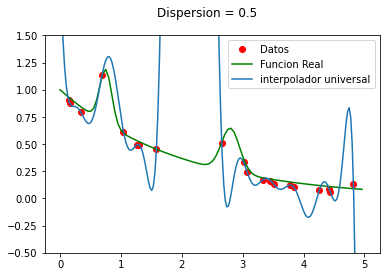

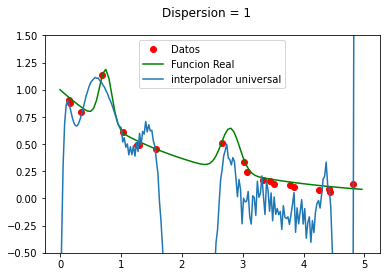

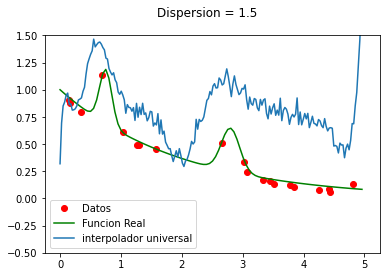

In [24]:
import matplotlib.pyplot as plt
import random

F = UniversalApproximator(gauss_function)
cond_F_0_5 = F.training(spectra_20[:,0], spectra_20[:,1], 0.5)
X_linspace = np.linspace(0,5,200)

print('>>> Numero de Condicion de la Matriz: '+ str(cond_F_0_5) + ' <<<')
plt.suptitle('Dispersion = 0.5')
plt.ylim(-0.5, 1.5)
plt.plot(spectra_20[:,0], spectra_20[:,1], 'ro',label = 'Datos')
plt.plot(spectra_real[:,0], spectra_real[:,1], 'g',label = 'Funcion Real')
plt.plot(X_linspace,F.predict(X_linspace),label='interpolador universal')
plt.legend()
plt.show()

cond_F_1 = F.training(spectra_20[:,0], spectra_20[:,1], 1)

plt.suptitle('Dispersion = 1')
plt.ylim(-0.5, 1.5)
plt.plot(spectra_20[:,0], spectra_20[:,1], 'ro',label = 'Datos')
plt.plot(spectra_real[:,0], spectra_real[:,1], 'g',label = 'Funcion Real')
plt.plot(X_linspace,F.predict(X_linspace),label='interpolador universal')
plt.legend()
plt.show()

cond_F_1_5 = F.training(spectra_20[:,0], spectra_20[:,1], 1.5)

plt.suptitle('Dispersion = 1.5')
plt.ylim(-0.5, 1.5)
plt.plot(spectra_20[:,0], spectra_20[:,1], 'ro',label = 'Datos')
plt.plot(spectra_real[:,0], spectra_real[:,1], 'g',label = 'Funcion Real')
plt.plot(X_linspace,F.predict(X_linspace),label='interpolador universal')
plt.legend()
plt.show()

>>> Numero de Condicion de la Matriz: 5995.20135499081 <<<


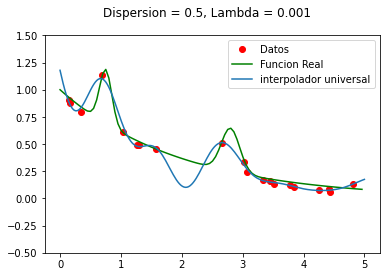

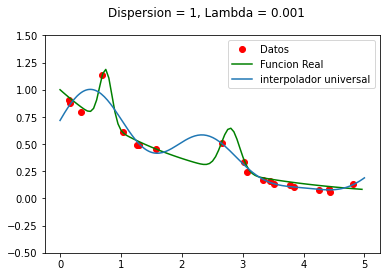

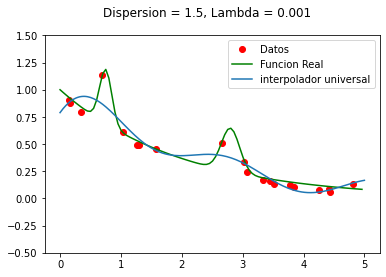

>>> Numero de Condicion de la Matriz: 599407.8181728815 <<<


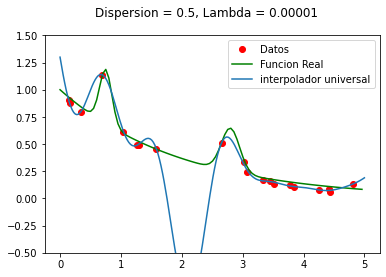

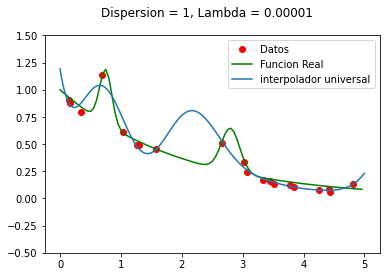

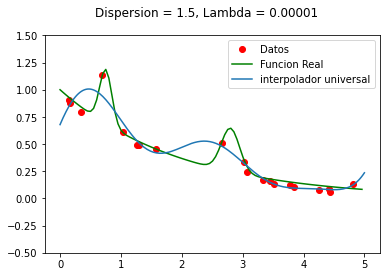

In [30]:
import matplotlib.pyplot as plt

F = UniversalApproximator(gauss_function, 0.001)
cond_F_0_5 = F.training(spectra_20[:,0], spectra_20[:,1], 0.5)
X_linspace = np.linspace(0,5,200)

print('>>> Numero de Condicion de la Matriz: '+ str(cond_F_0_5) + ' <<<')
plt.suptitle('Dispersion = 0.5, Lambda = 0.001')
plt.ylim(-0.5, 1.5)
plt.plot(spectra_20[:,0], spectra_20[:,1], 'ro',label = 'Datos')
plt.plot(spectra_real[:,0], spectra_real[:,1], 'g',label = 'Funcion Real')
plt.plot(X_linspace,F.predict(X_linspace),label='interpolador universal')
plt.legend()
plt.show()

cond_F_1 = F.training(spectra_20[:,0], spectra_20[:,1], 1)

plt.suptitle('Dispersion = 1, Lambda = 0.001')
plt.ylim(-0.5, 1.5)
plt.plot(spectra_20[:,0], spectra_20[:,1], 'ro',label = 'Datos')
plt.plot(spectra_real[:,0], spectra_real[:,1], 'g',label = 'Funcion Real')
plt.plot(X_linspace,F.predict(X_linspace),label='interpolador universal')
plt.legend()
plt.show()

cond_F_1_5 = F.training(spectra_20[:,0], spectra_20[:,1], 1.5)

plt.suptitle('Dispersion = 1.5, Lambda = 0.001')
plt.ylim(-0.5, 1.5)
plt.plot(spectra_20[:,0], spectra_20[:,1], 'ro',label = 'Datos')
plt.plot(spectra_real[:,0], spectra_real[:,1], 'g',label = 'Funcion Real')
plt.plot(X_linspace,F.predict(X_linspace),label='interpolador universal')
plt.legend()
plt.show()

F = UniversalApproximator(gauss_function, 0.00001)
cond_F_0_5 = F.training(spectra_20[:,0], spectra_20[:,1], 0.5)
X_linspace = np.linspace(0,5,200)

print('>>> Numero de Condicion de la Matriz: '+ str(cond_F_0_5) + ' <<<')
plt.suptitle('Dispersion = 0.5, Lambda = 0.00001')
plt.ylim(-0.5, 1.5)
plt.plot(spectra_20[:,0], spectra_20[:,1], 'ro',label = 'Datos')
plt.plot(spectra_real[:,0], spectra_real[:,1], 'g',label = 'Funcion Real')
plt.plot(X_linspace,F.predict(X_linspace),label='interpolador universal')
plt.legend()
plt.show()

cond_F_1 = F.training(spectra_20[:,0], spectra_20[:,1], 1)

plt.suptitle('Dispersion = 1, Lambda = 0.00001')
plt.ylim(-0.5, 1.5)
plt.plot(spectra_20[:,0], spectra_20[:,1], 'ro',label = 'Datos')
plt.plot(spectra_real[:,0], spectra_real[:,1], 'g',label = 'Funcion Real')
plt.plot(X_linspace,F.predict(X_linspace),label='interpolador universal')
plt.legend()
plt.show()

cond_F_1_5 = F.training(spectra_20[:,0], spectra_20[:,1], 1.5)

plt.suptitle('Dispersion = 1.5, Lambda = 0.00001')
plt.ylim(-0.5, 1.5)
plt.plot(spectra_20[:,0], spectra_20[:,1], 'ro',label = 'Datos')
plt.plot(spectra_real[:,0], spectra_real[:,1], 'g',label = 'Funcion Real')
plt.plot(X_linspace,F.predict(X_linspace),label='interpolador universal')
plt.legend()
plt.show()

## **Conclusiones**

![Experimento 1.0](
https://drive.google.com/uc?id=1zP6c5ZiyYh6LnpVjRoGSVY9XRknO87X5)

Para realizar este experimento se usaron 200 datos equidistantes entre 0 y 5 para predecir la curva de la función.

En la aproximación no regularizada podemos observar que se intenta crear una función que pase exactamente por todos los puntos, donde esto se logra aun más mientras la dispersión tiende a ser pequeña.

El número de condición de la matriz es $26709885064.102978$, donde se dice que está bien condicionada el número está cerca de 1 y se dice mal condicionada si es significativamente mayor que 1. Esto nos indica que pequeñas variaciones en los datos pueden producir grandes variaciones en los resultados y por tanto que la solución del sistema es propensa a grandes errores de aproximación.

Podemos observar que la dispersión que más se le adecua a la aproximación es la de $0.5$, donde se puede ver que la función pasa por todos los datos.

![Experimento 1.1](
https://drive.google.com/uc?id=1SzZJwM7OYsX1Rl1LwqDwt3nkejB2QPwk)

![Experimento 1.2](
https://drive.google.com/uc?id=1ntG3-SIFOa0THYoNyvcfTb-IkvbVNclp)

Para regularizar la aproximación, se intento con varios valores de $\lambda \in [0.1, 0.00001]$, llegando a concluir que los dos mejores resultados que consideré, uno de ellos con $\lambda = 0.001$ y $\sigma = 0.5$, donde se observó que a pesar que la aproximación no es exactamente identica, se acera mucho a la función real, si no fuera por la curva descendiente que crece a medida que disminute $\lambda$ en $x = 2$, la catalogaría como la mejor conseguida. La otra que considero que también se asemeja mucho a la función real es la encontrada con $\lambda = 0.00001$ y $\sigma = 1$, que a simple vista hay un par de datos por las que no pasa pero es la que tiene un comportamiento similar a la función real.

En cuanto a los números de condiciones de las matrices, para ambas $\lambda = 0.001$ y $\lambda = 0.00001$, se consiguió una condición baja en comparación a la encontrada con la aproximación no regularizada. Y comparandolas entre ellas mismas resulto que tener un lambda mas cercano al 0, el número condicional tiende a ser mas grande y por ende se producirían mayores variaciones en los resultados.

# Parte 2: RBF

Aproxime los datos en la serie dada por *spectra100.csv* usando redes RBF.

* Deje fijo el parámetro de dispersión ($\sqrt{0.5}$) y experimente variando el número de centros determinados **(i)** al azar y **(ii)** mediante un algoritmo de conglomerados. Comente sus resultados.
* Una vez determinados los centros, realice pruebas para determinar el mejor parámetro
de dispersión.

In [8]:
import numpy as np
from math import exp

class RBF:
  '''
    [Clase RBF]
      Representara enuestra red basada en RBF donde se buscara construir una funcion
      que pase por todos los datos.

    INIT: phi_function   -> Función de base radial
          w              -> Pesos
          X              -> Datos de entrenamiento
          k              -> Centros
          sigma          -> Dispersion
  '''
  def __init__(self, phi_function):
      self.phi_function = phi_function
      self.w = []
      self.X = []
      self.k = []
      self.sigma = 1

  def training(self, data, d, kmeans, k, sigma=1):
    '''
      {Funcion training}
        Se realiza el entrenamiento no iterativo para el ajuste de los datos
        y calcular w
      INPUT:  data        -> Vector con los datos a procesar
              d           -> Valor esperado de un dato
              kmeans      -> Funcion para obtener los centros
              k           -> Numero de centros
              sigma       -> Dispersion por defecto es 1
      
      OUTPUT: float       -> Numero condicional de la matriz asociada
    '''
    self.X = data.copy()
    self.k = kmeans(data, k)
    self.sigma = sigma
    phi = self.__green_matrix(self.X, self.k)
    phi_matrix = np.dot(np.transpose(phi), phi)
    phi_pinv = np.linalg.pinv(phi_matrix)
    self.w = np.dot(np.dot(phi_pinv, np.transpose(phi)), d)
    return np.linalg.cond(phi_pinv)

  def predict(self, X):
    '''
      {Funcion predict}
        Funcion resultante para aproximar los datos
      INPUT:  X        -> Vector con los datos a procesar
      
      OUTPUT: matrix   -> Matriz resultante
    '''
    result = []
    for x in X:
      result.append(np.dot(self.w, [self.phi_function(x, ki, self.sigma) for ki in self.k]))
    return result

  def __green_matrix(self, X, Y):
    '''
      {Funcion green_matrix}
        Se realiza el calculo de la matrix no-singular de las funciones
        radiales
      INPUT:  X        -> Vector con los datos a procesar
      
      OUTPUT: matrix   -> Matriz resultante
    '''
    matrix = []
    for i in X:
      row = []
      for j in Y:
        row.append(self.phi_function(i, j, self.sigma))
      matrix.append(row)
    return matrix

def gauss_function(x, y, sigma=1):
  '''
      {Funcion gauss_function}
        Es la funcion de base radial que usaremos
      INPUT:  x        -> Primer dato para evaluar
              y        -> Segundo dato para evaluar
              sigma    -> Parametro de dispersion que por defecto es 1
      
      OUTPUT: float    -> Resultado de aplicar la funcion Gauss
    '''
  r = np.linalg.norm(x-y)
  return exp(- r**2/(2*(sigma**2)))

def clusterMeans(X, k, max_iters=20):
  '''
    {Funcion clusterMeans}
      Funcion que busca los centros apropiados donde existe similaridad en los
      datos y los agrupa

      INPUT:  X         -> Vector con los datos de entrada
              k         -> Numero de centros a generar
              max_iters -> Limite
      
      OUTPUT: centroids -> Arreglo con los centros apropiados
  '''
  centroids = randomMeans(X, k)
  converged = False
  current_iter = 0
  while (not converged) and (current_iter < max_iters):
    cluster_list = [[] for i in range(len(centroids))]
    for x in X:
      distances_list = []
      for c in centroids:
        distances_list.append(np.linalg.norm(c-x))
      cluster_list[int(np.argmin(distances_list))].append(x)
    cluster_list = list((filter(None, cluster_list)))
    prev_centroids = centroids.copy()
    centroids = []
    for j in range(len(cluster_list)):
      centroids.append(np.mean(cluster_list[j], axis=0))
    pattern = np.abs(np.sum(prev_centroids) - np.sum(centroids))
    converged = (pattern == 0)
    current_iter += 1
  return centroids

def randomMeans(X, k):
  '''
    {Funcion randomMeans}
      Funcion que busca centros aleatorios

      INPUT:  X         -> Vector con los datos de entrada
              k         -> Numero de centros a generar
      
      OUTPUT: centroids -> Arreglo con los centros aleatorios
  '''
  centroids = X[np.random.choice(range(len(X)), k, replace=False)]
  return centroids

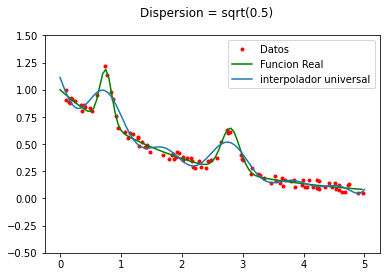

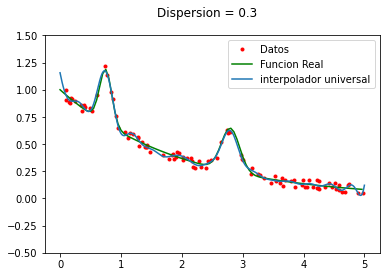

In [46]:
import matplotlib.pyplot as plt
from math import sqrt

F = RBF(gauss_function)
cond_F_Cluster = F.training(spectra_100[:,0], spectra_100[:,1], clusterMeans, len(spectra_100)//2, sqrt(0.5))
X_linspace = np.linspace(0,5,300)

plt.suptitle('Dispersion = sqrt(0.5)')
plt.ylim(-0.5, 1.5)
plt.plot(spectra_100[:,0], spectra_100[:,1], 'r.',label = 'Datos')
plt.plot(spectra_real[:,0], spectra_real[:,1], 'g',label = 'Funcion Real')
plt.plot(X_linspace,F.predict(X_linspace),label='interpolador universal')
plt.legend()
plt.show()

cond_F_Cluster = F.training(spectra_100[:,0], spectra_100[:,1], clusterMeans, len(spectra_100)//2, 0.3)

plt.suptitle('Dispersion = 0.3')
plt.ylim(-0.5, 1.5)
plt.plot(spectra_100[:,0], spectra_100[:,1], 'r.',label = 'Datos')
plt.plot(spectra_real[:,0], spectra_real[:,1], 'g',label = 'Funcion Real')
plt.plot(X_linspace,F.predict(X_linspace),label='interpolador universal')
plt.legend()
plt.show()

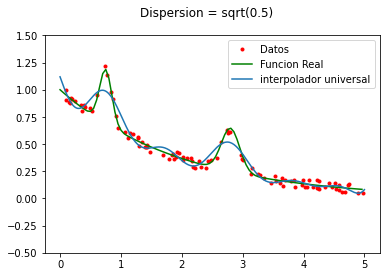

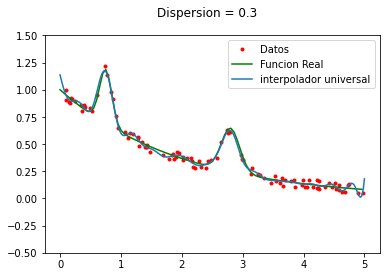

In [48]:
import matplotlib.pyplot as plt
from math import sqrt

F = RBF(gauss_function)
cond_F_Cluster = F.training(spectra_100[:,0], spectra_100[:,1], randomMeans, len(spectra_100)//2, sqrt(0.5))
X_linspace = np.linspace(0,5,300)

plt.suptitle('Dispersion = sqrt(0.5)')
plt.ylim(-0.5, 1.5)
plt.plot(spectra_100[:,0], spectra_100[:,1], 'r.',label = 'Datos')
plt.plot(spectra_real[:,0], spectra_real[:,1], 'g',label = 'Funcion Real')
plt.plot(X_linspace,F.predict(X_linspace),label='interpolador universal')
plt.legend()
plt.show()

cond_F_Cluster = F.training(spectra_100[:,0], spectra_100[:,1], randomMeans, len(spectra_100)//2, 0.3)

plt.suptitle('Dispersion = 0.3')
plt.ylim(-0.5, 1.5)
plt.plot(spectra_100[:,0], spectra_100[:,1], 'r.',label = 'Datos')
plt.plot(spectra_real[:,0], spectra_real[:,1], 'g',label = 'Funcion Real')
plt.plot(X_linspace,F.predict(X_linspace),label='interpolador universal')
plt.legend()
plt.show()

![Experimento 2.0](
https://drive.google.com/uc?id=1q2H--OJJPo9zEjYutWL9AzPZx7JOBa07)

![Experimento 2.1](
https://drive.google.com/uc?id=1BLkPG7TS5qQXjZy0ptWeFLDwc2rmKILq)

Para este experimento podemos observar que la aproximación con RBF, con centros escogidos tanto por aglomeramiento como aleatorio, dan prácticamente iguales con $\sigma = 0.3$, que fue la mejor dispersión encontrada de las que se probaron entre $(0,1.5]$.

Podemos concluir que para este caso, el mejor método para escoger los centros para llevar acabo el RBF es el que lo hace al azar, porque es más sencillo de implementar, se realizan menos cálculos y se obtienen resultados razonablemente iguales.

En diferencia con el aproximador universal tanto regularizado como no regularizado, con RBF se aproximó una función mucho mas adecuada al *Spectra_Real* demostrando ser mejor la mejor para ello.

# Parte 3: Demostración

### Pruebe que $k(x, z) = k_1(x, z)k_2(x, z)$ es un kernel si $k_1$ y $k_2$ lo son.

Sean $k_1$ y $k_2$ dos kernels tales que:

$$k_1(x,z) = \phi(x)^T \phi(z)$$
$$k_2(x,z) = \varphi(x)^T \varphi(z)$$

Ya que $k_1$ y $k_2$ son kernels válidos, sabemos que deben admitir una representación interna del producto, donde $\phi$ denotará el vector de características de $k_1$ y $\varphi$ denotará lo mismo para $k_2$, siendo

$$\phi(y) = [\phi_1(y), \phi_2(y),...,\phi_M(y)]$$
$$\varphi(y) = [\varphi_1(y), \varphi_2(y),...,\varphi_N(y)]$$

Entonces $\phi$ es una función que produce un un vector de dimensión $M$, y $\varphi$ produce un vector de dimensión $N$. Luego podemos reescribir el producto interno de $k_1$ y $k_2$ como:

$$k(x, z) = k_1(x, z)k_2(x, z)$$
$$k(x, z) = \left ( \sum_{m=1}^{M} \phi_m(x)\phi_m(z) \right ) \left ( \sum_{n=1}^{N} \varphi_n(x)\varphi_n(z) \right )$$
$$k(x, z) = \sum_{m=1}^{M} \sum_{n=1}^{N} [\phi_m(x)\varphi_n(x)] [\phi_m(z)\varphi_n(z)] $$
$$k(x, z) = \sum_{m=1}^{M} \sum_{n=1}^{N} p_{mn}(x)p_{mn}(z)$$
$$k(x, z) = p(x)^Tp(z)$$

Donde $p(y)$ es un vector de dimensión $M \times N$ y $p_{mn}(y) = \phi_m(y) \varphi_n(y)$. Ahora podemos escribir $k(x,z)$ como producto interno usando el mapa de características $p$ y por ende $k$ es un kernel válido.
